# 1. Aim:

To Study and implement Linear Regression.

# 2. Theory:

## 2.1 Definition & Working principle

Linear regression is a statistical technique that is used to model the relationship between a dependent variable and one or more independent variables. It assumes that the relationship between the variables is linear, meaning that the change in the dependent variable is proportional to the change in the independent variable(s).

The working principle of linear regression involves finding a line of best fit that represents the linear relationship between the dependent variable and one or more independent variables. The line of best fit is determined by minimizing the sum of the squared differences between the actual values of the dependent variable and the predicted values of the dependent variable.

The basic formula for linear regression is:

y = mx + b

Where:

y = dependent variable
x = independent variable
m = slope of the line (the change in y for a given change in x)
b = y-intercept (the point at which the line crosses the y-axis)
The goal of linear regression is to find the values of m and b that minimize the sum of the squared differences between the actual values of y and the predicted values of y. This is typically done using a technique called ordinary least squares (OLS) regression.

Once the line of best fit has been determined, it can be used to make predictions about the value of the dependent variable based on the value(s) of the independent variable(s). Linear regression is a widely used technique in statistics, economics, finance, and other fields where it is necessary to model the relationship between variables.

## 2.2 Hypothesis Representation

In linear regression, a hypothesis represents the relationship between the dependent variable and the independent variable(s). It is typically represented as an equation in the form of:

y = β0 + β1x1 + β2x2 + ... + βnxn

Where:

y is the dependent variable
β0 is the y-intercept
β1, β2, ..., βn are the coefficients of the independent variables x1, x2, ..., xn
The coefficients represent the change in the dependent variable associated with a one-unit change in the corresponding independent variable, while holding all other independent variables constant.

For example, in a simple linear regression with one independent variable x and one dependent variable y, the hypothesis can be represented as:

y = β0 + β1x

Where:

y is the dependent variable
x is the independent variable
β0 is the y-intercept (the value of y when x=0)
β1 is the slope (the change in y associated with a one-unit change in x)
The hypothesis represents the line of best fit that is determined through the process of linear regression. The coefficients β0 and β1 are estimated based on the data, and the resulting equation can be used to make predictions about the value of the dependent variable based on the value of the independent variable(s).

## 2.3 Cost Function

In linear regression, the cost function is a measure of how well the model fits the data. The goal of linear regression is to minimize the cost function, which is typically represented as the mean squared error (MSE).

The MSE is calculated as the average of the squared differences between the actual values of the dependent variable and the predicted values of the dependent variable. The formula for the MSE is:

MSE = (1/n) * ∑(yᵢ - ŷᵢ)²

Where:

n is the number of observations
yᵢ is the actual value of the dependent variable for the i-th observation
ŷᵢ is the predicted value of the dependent variable for the i-th observation
The goal of linear regression is to find the values of the coefficients (β0, β1, ..., βn) that minimize the MSE. This is typically done using a technique called ordinary least squares (OLS) regression, which involves finding the values of the coefficients that minimize the sum of the squared differences between the actual values and the predicted values.

The cost function is an important concept in linear regression because it provides a way to evaluate the performance of the model and to compare different models. By minimizing the cost function, we can find the line of best fit that represents the relationship between the dependent variable and the independent variable(s) and use it to make predictions about the value of the dependent variable based on the value(s) of the independent variable(s).


# 3. Implementation

## 3.1 Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

/tmp/ipykernel_7935/3375049000.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:
df = pd.read_csv('insurance.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')
df.head()


Number of rows and columns in the data set:  (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Fitting Regression line into the *bmi* column wrt *charges*(target)

Text(0.5, 1.0, 'Charge Vs BMI')

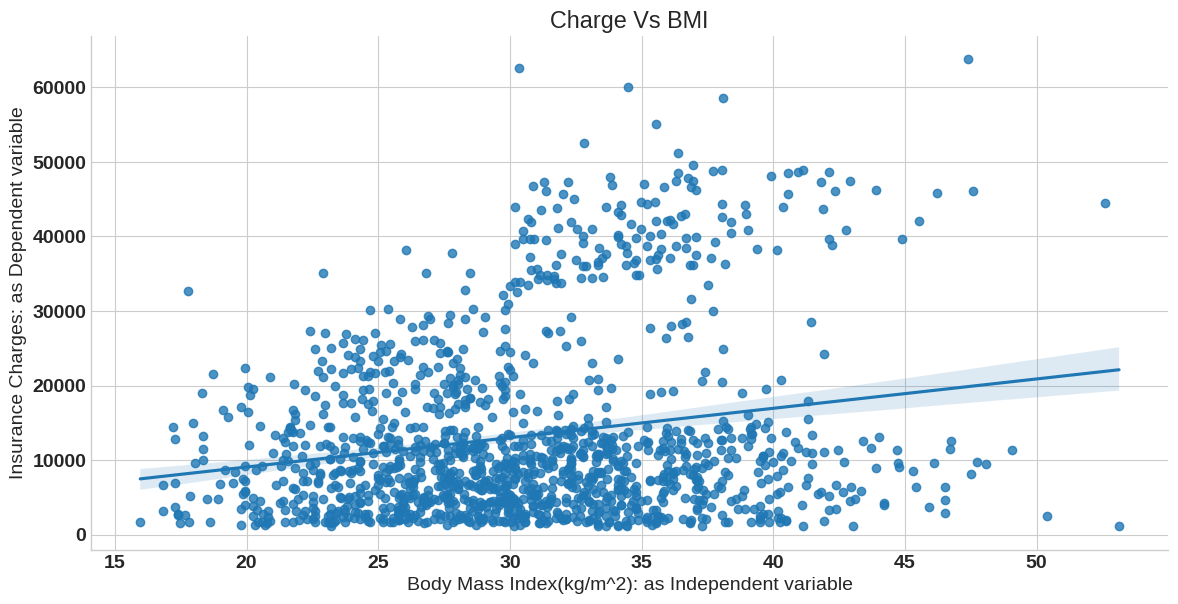

In [4]:
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Body Mass Index(kg/m^2): as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI')

## 3.2 Exploratory Data Analysis (EDA) on the Dataset


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

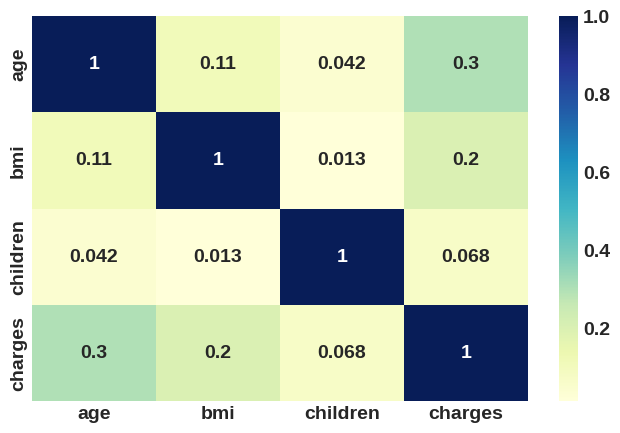

In [7]:
drop_cols=['sex','region','smoker']
dff=df.drop(drop_cols, axis=1)

# correlation heatmap
corr=dff.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

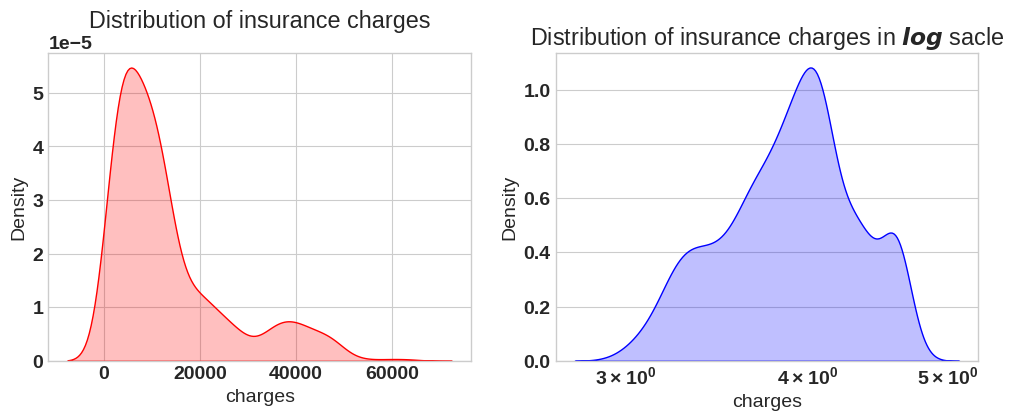

In [8]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.kdeplot(df['charges'],fill=True, color="r")
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.kdeplot(np.log10(df['charges']),fill=True, color="b")
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

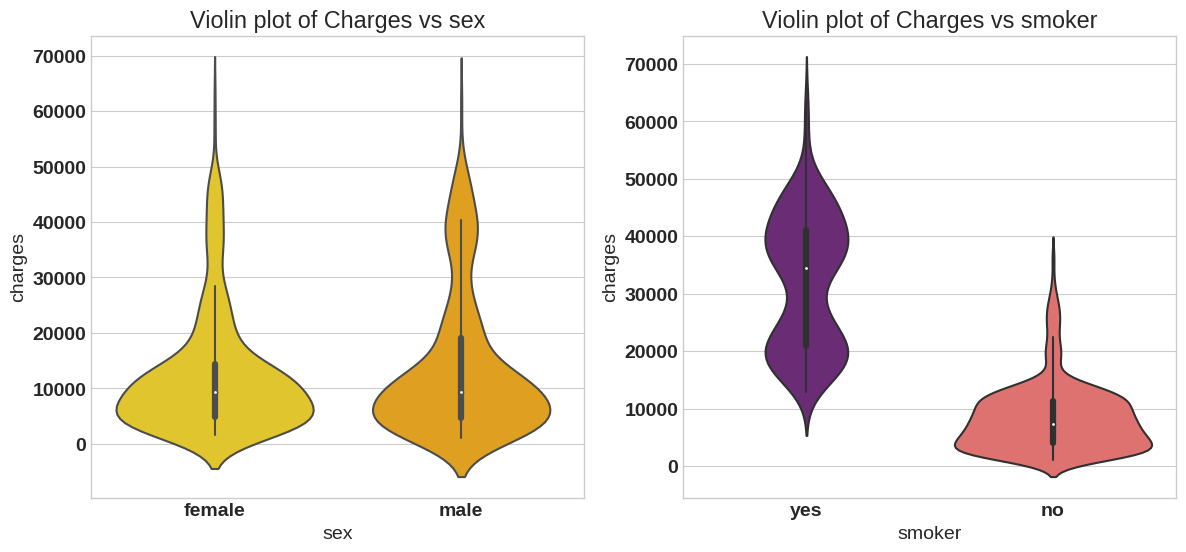

In [9]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

Text(0.5, 1.0, 'Box plot of charges vs children')

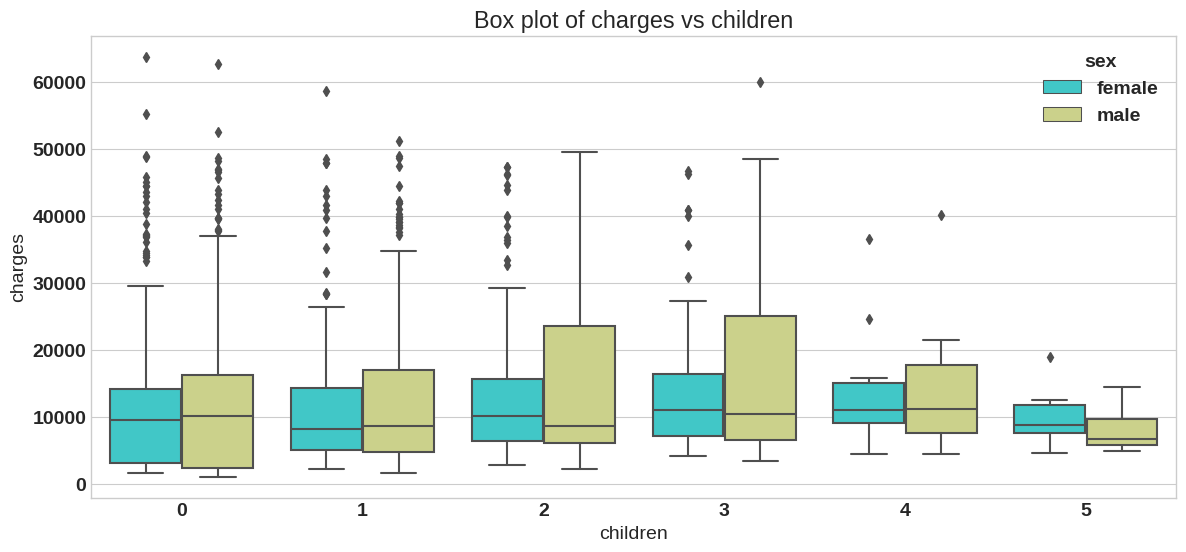

In [10]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children')

In [11]:
dff.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


Text(0.5, 1.0, 'Violin plot of charges vs children')

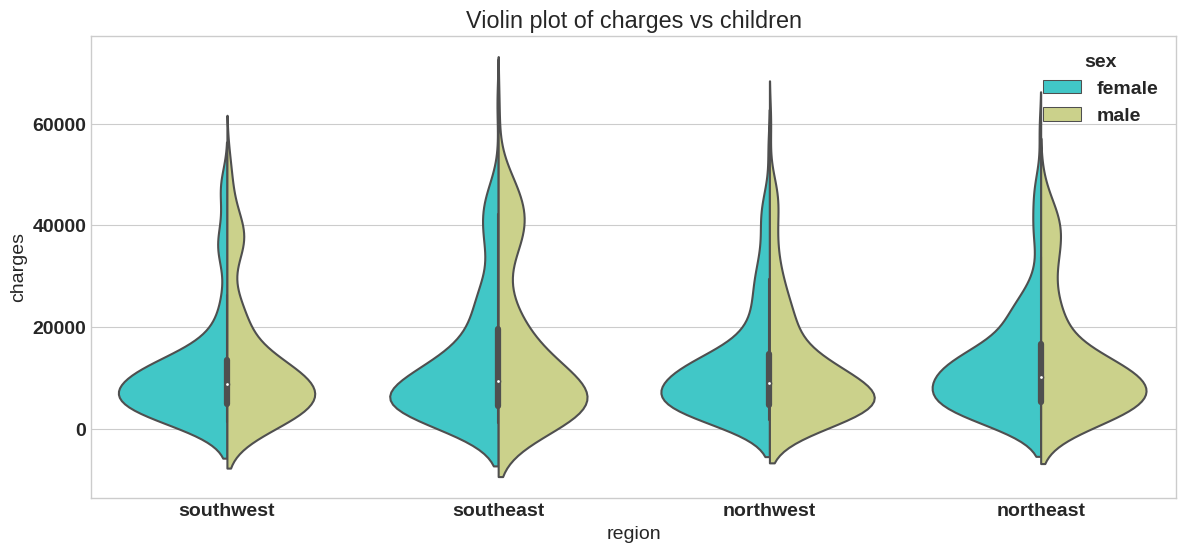

In [12]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='rainbow',split=True)
plt.title('Violin plot of charges vs children')

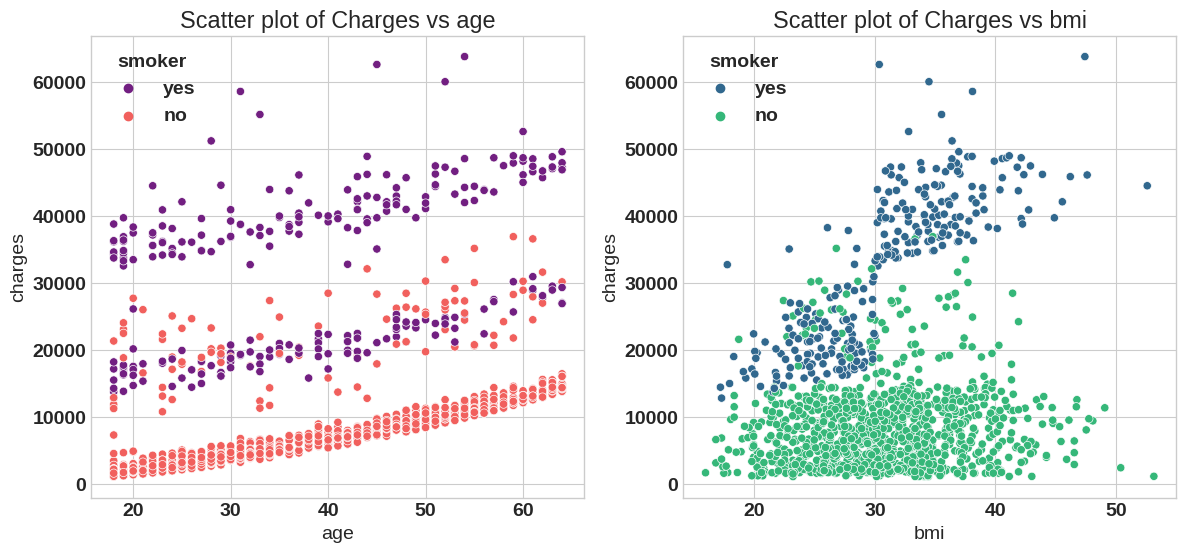

In [13]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

## 3.3 Data Preprocessing

### 3.3.1 Encoding:
1. Label Encoding
2. One Hot Encoding
3. Dummy variable Trap

In [14]:
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


### 3.3.2 Box Cox Transformation on *charges*

In [15]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['charges'],alpha=0.05)

#df['charges'] = y_bc  did not performed better:(
ci,lam

((-0.01140290617291315, 0.09880968597675766), 0.043649071028766986)

In [16]:
# Log transform
df_encode['charges'] = np.log(df_encode['charges'])
df_encode.head()

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,9.734176,0,0,0,0,0,0,1,0,0,1
1,18,33.770,7.453302,1,1,0,0,0,0,0,0,1,0
2,28,33.000,8.400538,1,0,0,1,0,0,0,0,1,0
3,33,22.705,9.998092,1,0,0,0,0,0,0,1,0,0
4,32,28.880,8.260197,1,0,0,0,0,0,0,1,0,0


### 3.3.3 Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

## 3.4 Modeling and Evaluation

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

preds=lin_reg.predict(X_test)
residuals=y_test - preds

mse=np.mean(residuals**2)
rmse=np.sqrt(mse)
print('MSE:', mse)
print('RMSE:', rmse)

print('\n')
print('Evaluation using sklearn')
from sklearn.metrics import mean_squared_error
print('MSE:', mean_squared_error(preds, y_test))
print('R_Square:', lin_reg.score(X_test, y_test))

MSE: 0.1872962232298189
RMSE: 0.4327773367793407


Evaluation using sklearn
MSE: 0.1872962232298189
R_Square: 0.7795687545055319
